In [71]:
%pylab inline
%config InlineBackend.figure_formats = ['retina']

import pandas as pd
import seaborn as sns
sns.set()

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

Populating the interactive namespace from numpy and matplotlib


In [72]:
book_movie = pd.read_csv('book_movie_database.csv')

/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


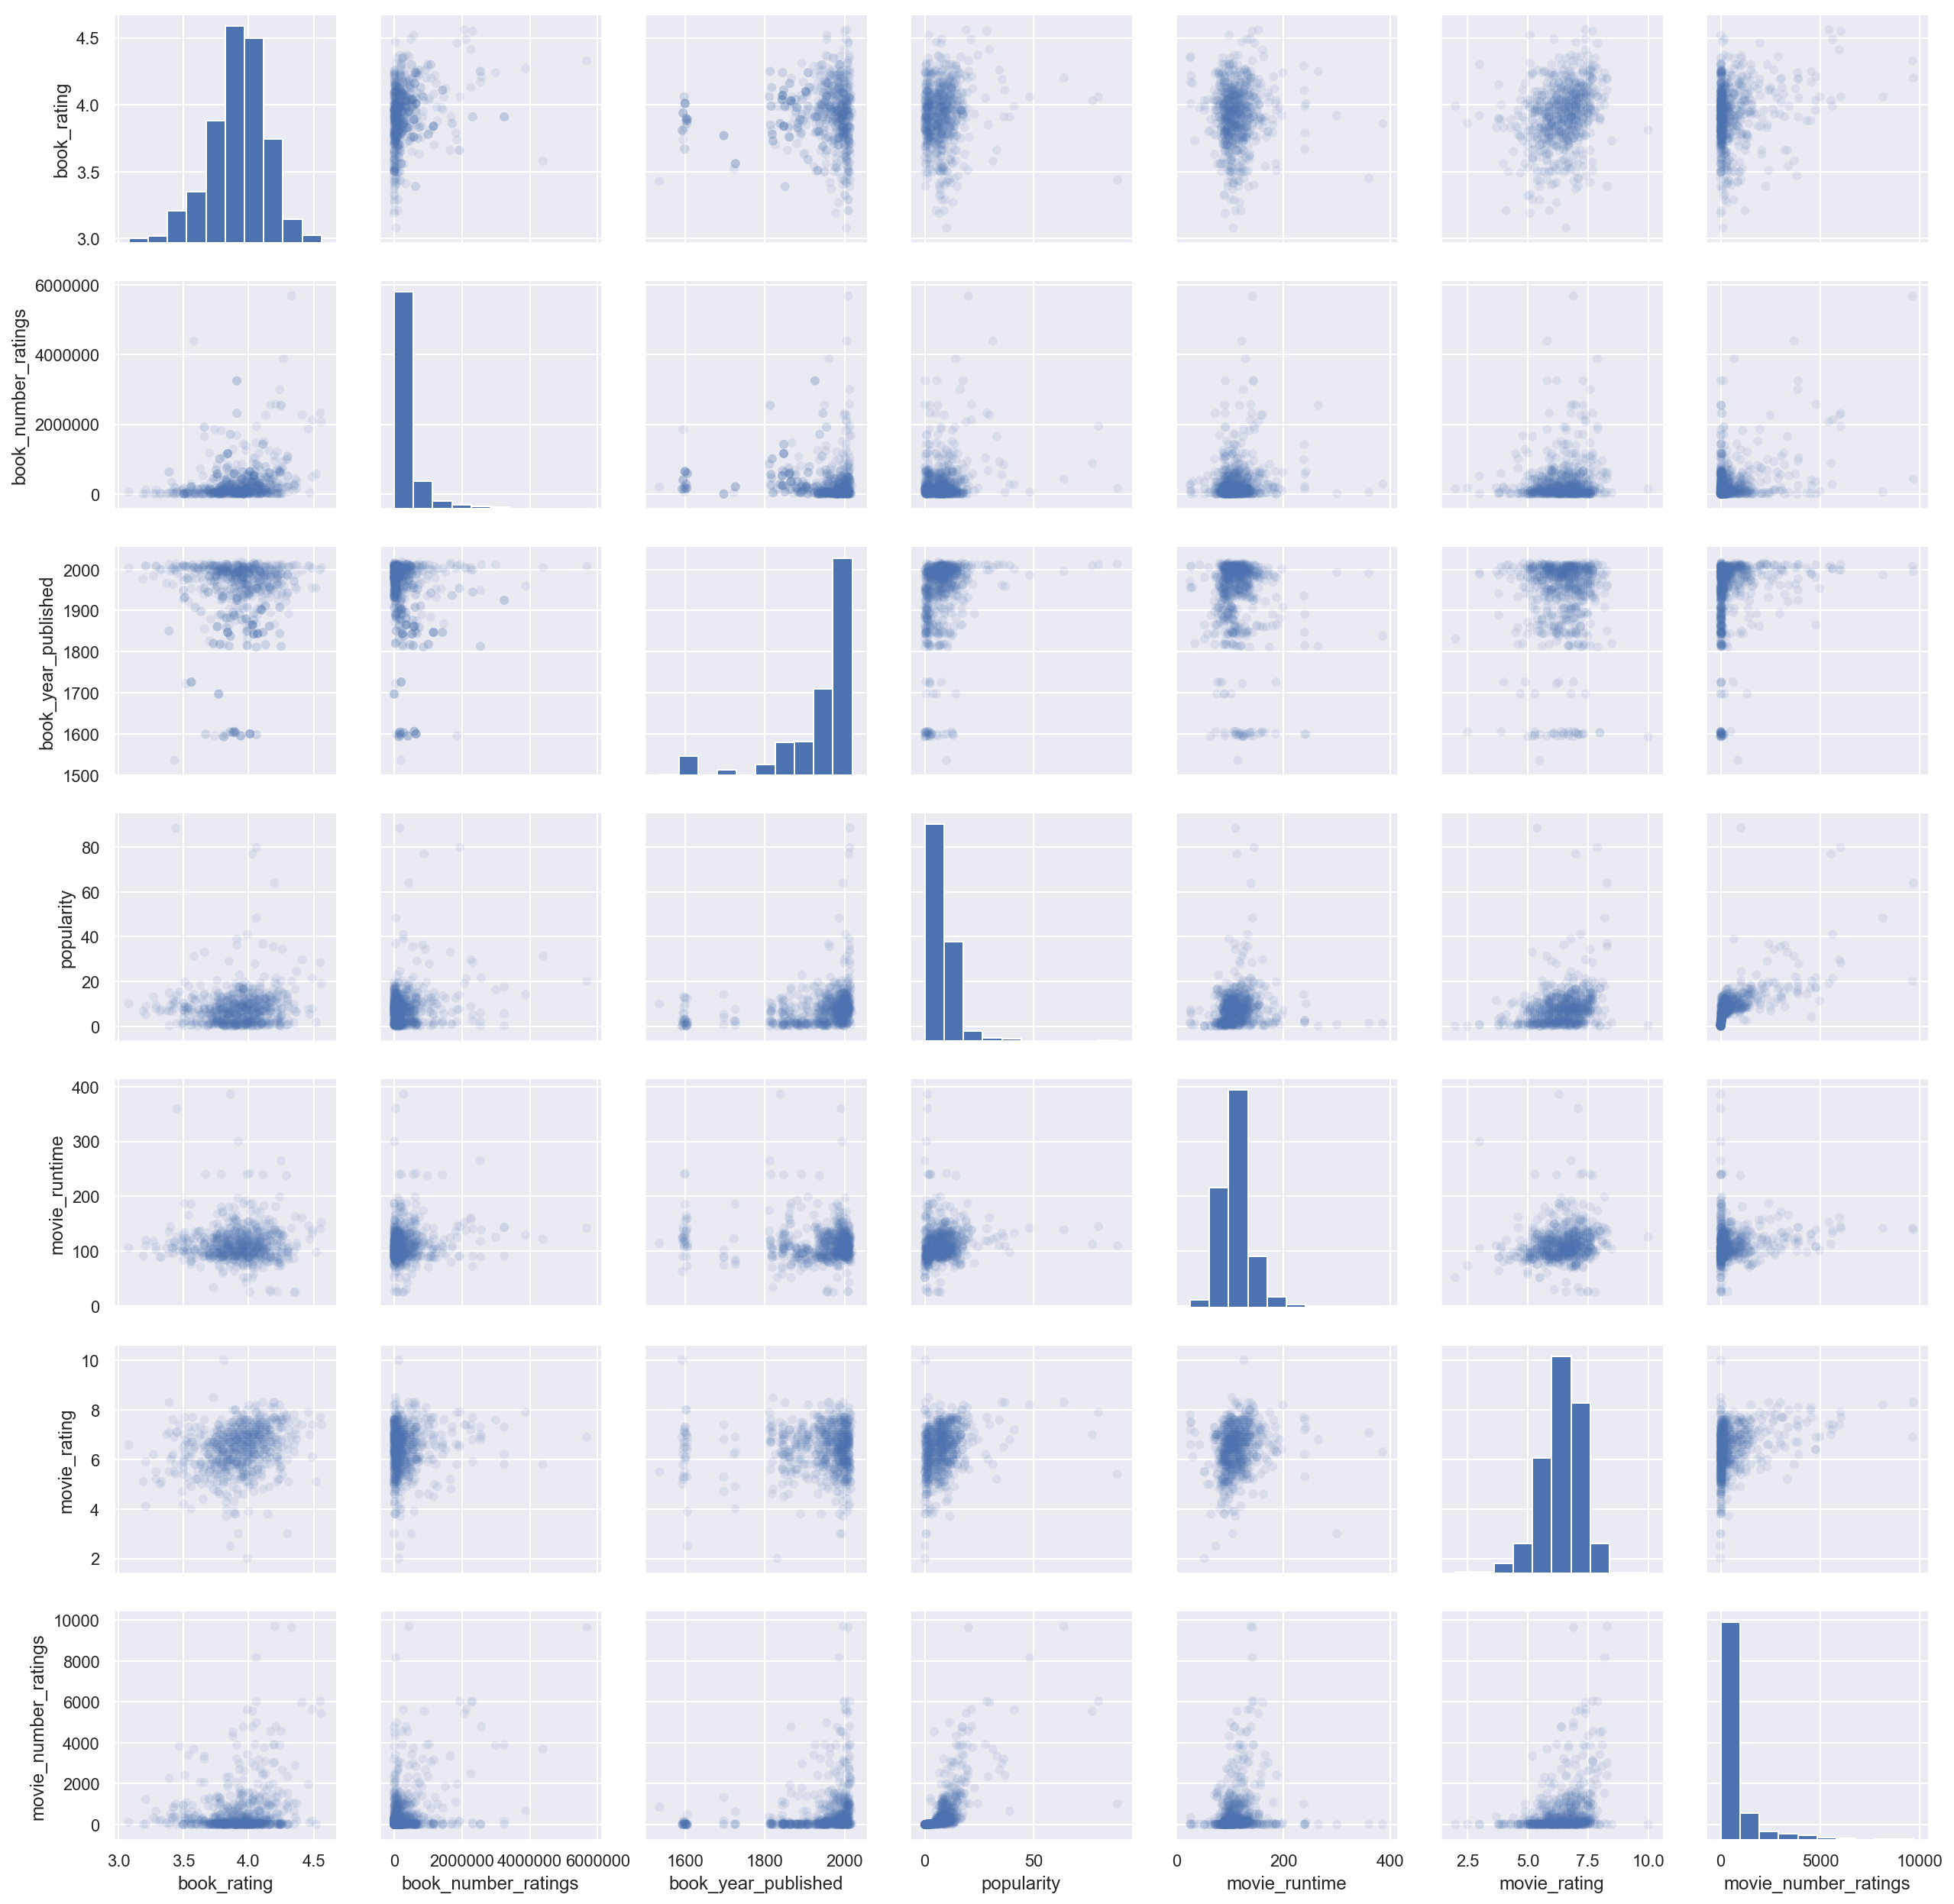

In [73]:
sns.pairplot(book_movie, plot_kws=dict(alpha=.1, edgecolor='none'))

In [74]:
#Separate our features from our target

X = book_movie.loc[:,['book_rating', 'book_number_ratings', 'popularity', 'movie_runtime', 'movie_number_ratings']]

y = book_movie['movie_rating']

In [75]:
def split_and_validate(X, y):
    '''
    For a set of features and target X, y, perform a 80/20 train/val split, 
    fit and validate a linear regression model, and report results
    '''
    
    # perform train/val split
    X_train, X_val, y_train, y_val = \
        train_test_split(X, y, test_size=0.2, random_state=42)
    
    # fit linear regression to training data
    lr_model = LinearRegression()
    lr_model.fit(X_train, y_train)
    
    # score fit model on validation data
    val_score = lr_model.score(X_val, y_val)
    
    # report results
    print('\nValidation R^2 score was:', val_score)
    print('Feature coefficient results: \n')
    for feature, coef in zip(X.columns, lr_model.coef_):
        print(feature, ':', f'{coef:.2f}') 
        

In [76]:
split_and_validate(X, y)


Validation R^2 score was: 0.16360870330672117
Feature coefficient results: 

book_rating : 0.96
book_number_ratings : -0.00
popularity : 0.01
movie_runtime : 0.00
movie_number_ratings : 0.00


In [100]:
X2 = X.copy()

# multiplication interaction
X2['movie_popularity'] = X2['popularity']/X2['movie_number_ratings']

split_and_validate(X2, y)


Validation R^2 score was: 0.18252335541433265
Feature coefficient results: 

book_rating : 0.96
book_number_ratings : -0.00
popularity : 0.01
movie_runtime : 0.00
movie_number_ratings : 0.00
movie_popularity : -1.64


In [105]:
X3 = X2.copy()

# log
#X3['movie_popularity'] = np.log(X3['movie_popularity'])
X3['popularity'] = np.log(X3['popularity'])
X3['book_number_ratings'] = np.log(X3['book_number_ratings'])
X3['movie_number_ratings'] = np.log(X3['movie_number_ratings'])
X3['movie_runtime'] = np.log(X3['movie_runtime'])

split_and_validate(X3, y)


Validation R^2 score was: 0.20835409273624417
Feature coefficient results: 

book_rating : 1.01
book_number_ratings : -0.02
popularity : 0.01
movie_runtime : 0.34
movie_number_ratings : 0.12
movie_popularity : -0.59


In [93]:
X4 = X3.copy()

X4


split_and_validate(X4, y)


Validation R^2 score was: 0.1993507135019712
Feature coefficient results: 

book_rating : 1.00
popularity : 0.17
movie_runtime : 0.00
movie_popularity : -1.58


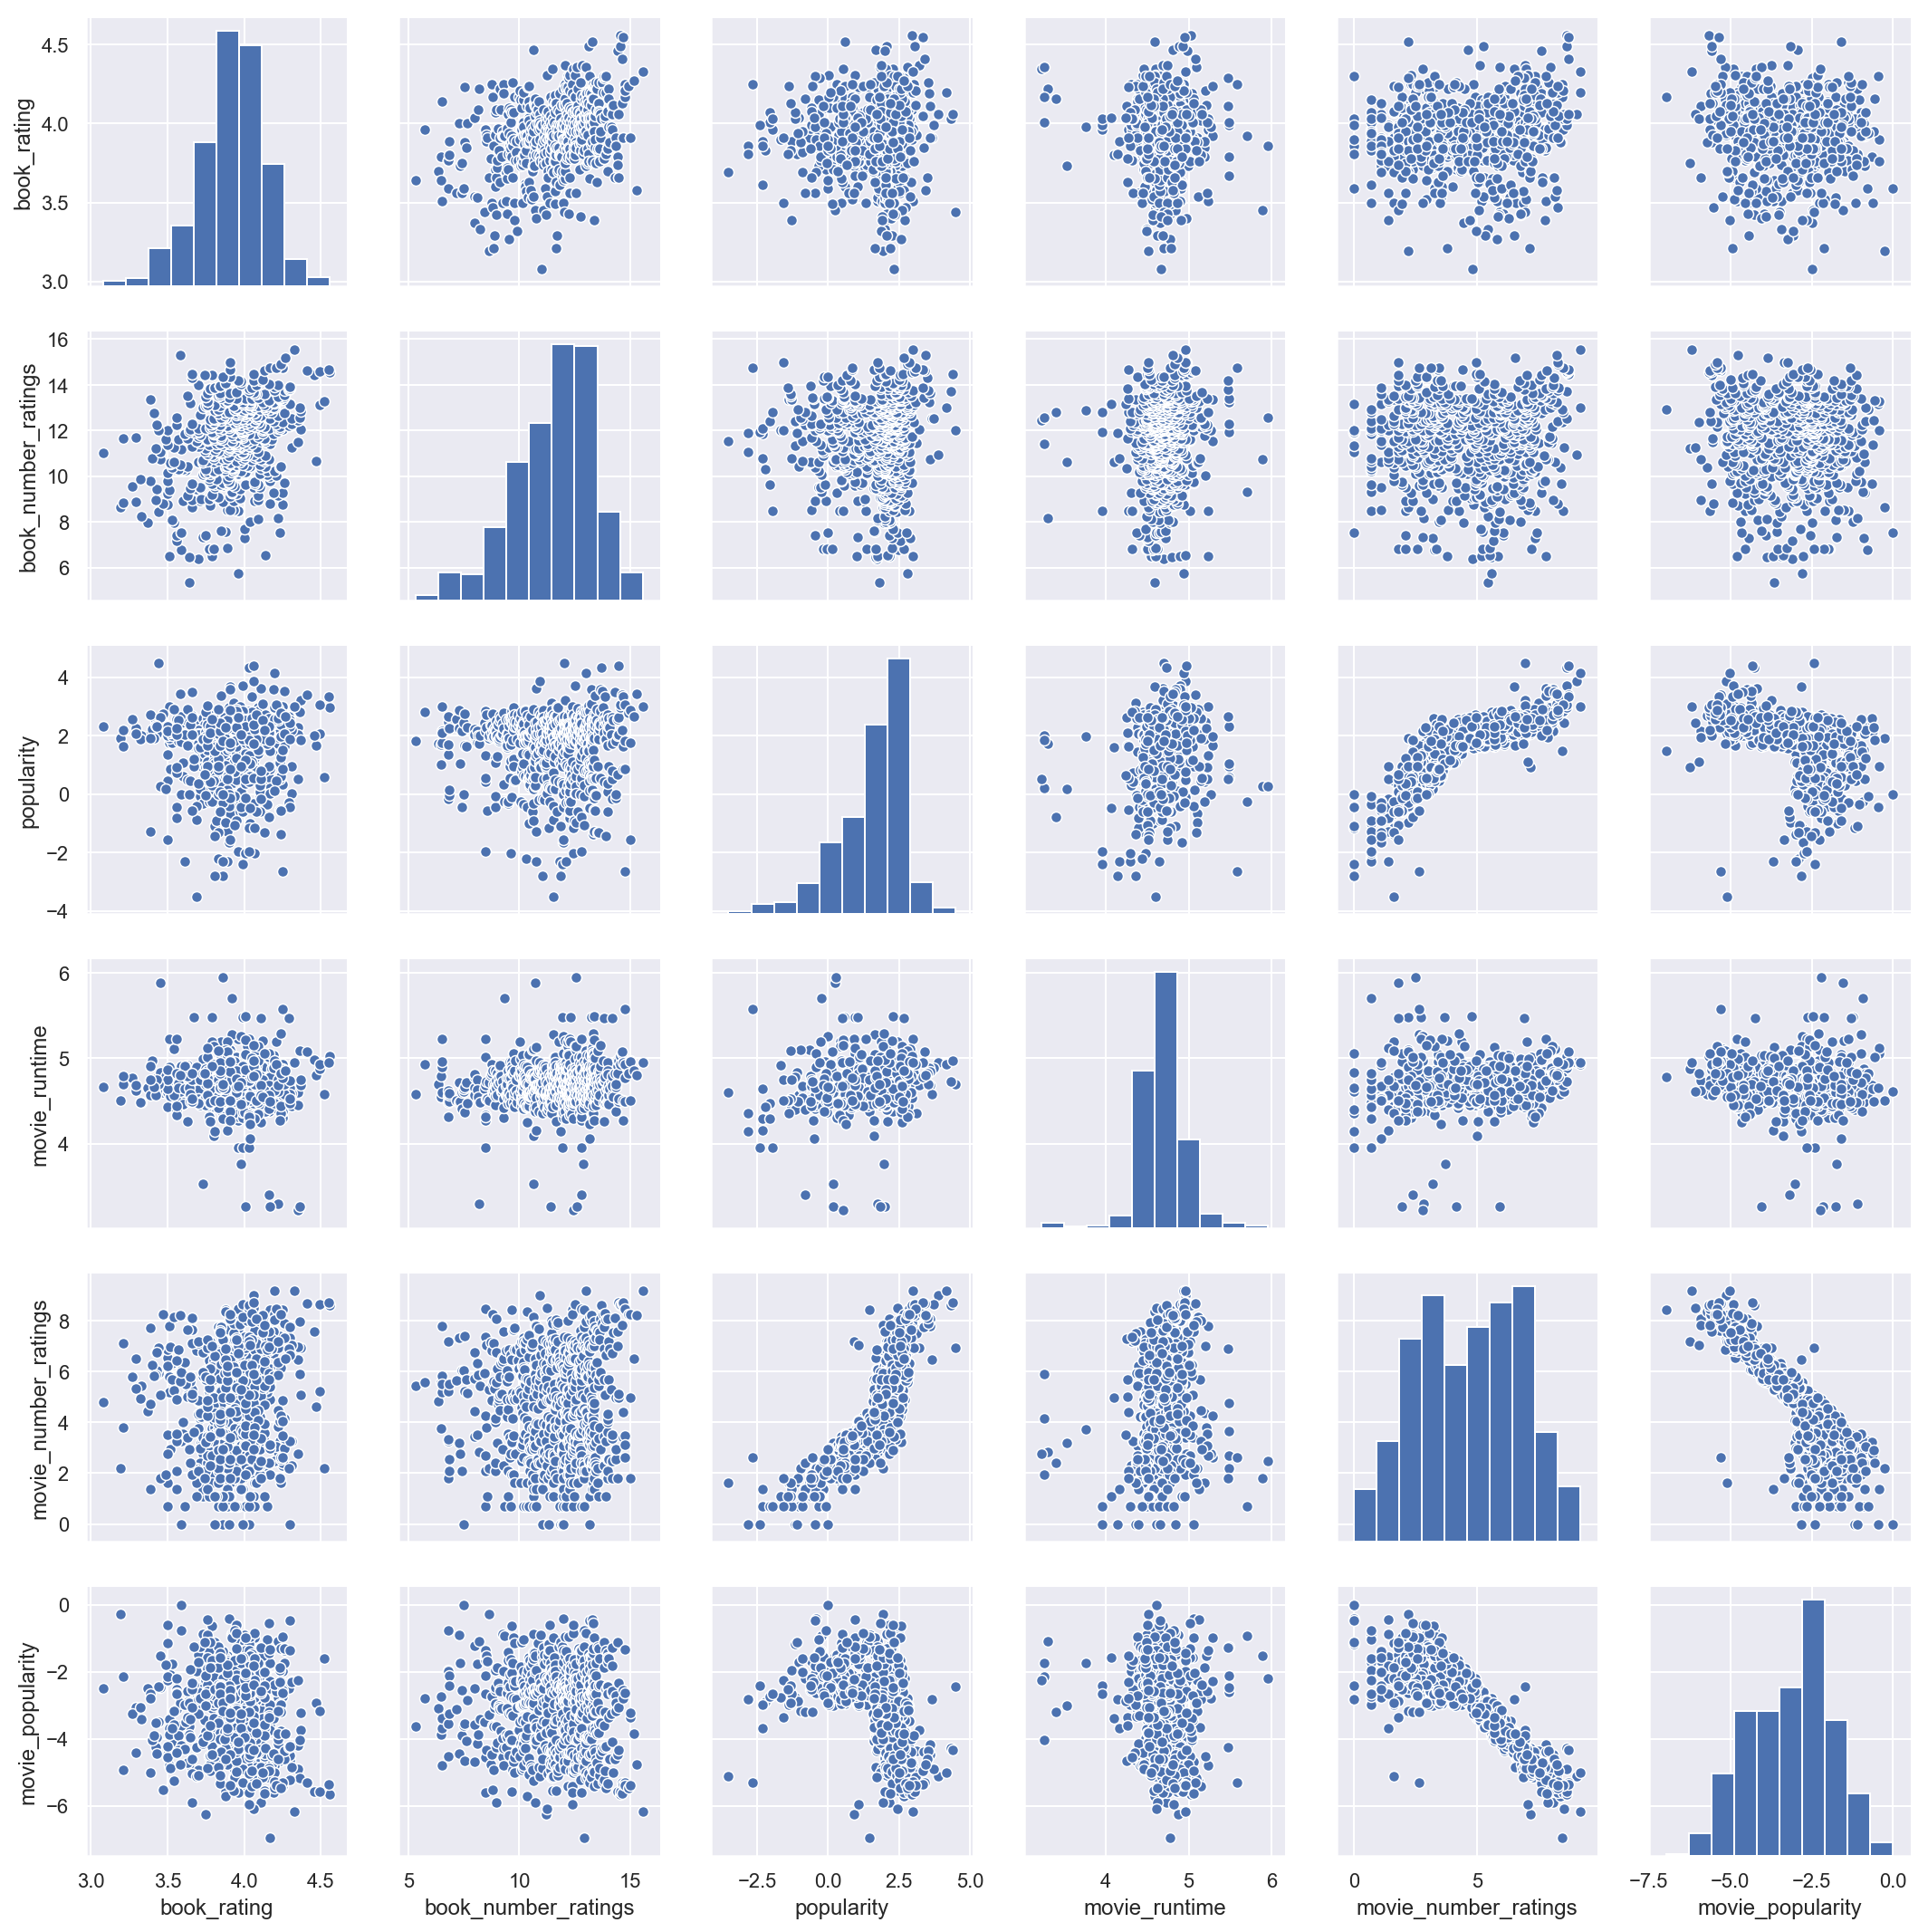

In [102]:
sns.pairplot(X3)